# Исследовательский анализ параметров, влияющие на рыночную стоимость объектов недвижимости

### Цель проекта: определять приблизительную рыночную стоимость объектов недвижимости с учетом некоторых параметров.

### Задачи проекта: провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов.

## Условные обозначения в таблице:

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

**balcony** — число балконов

**ceiling_height** — высота потолков (м)

**cityCenters_nearest** — расстояние до центра города (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

**first_day_exposition** — дата публикации

**floor** — этаж

**floors_total** — всего этажей в доме

**is_apartment** — апартаменты (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**last_price** — цена на момент снятия с публикации

**living_area** — жилая площадь в квадратных метрах (м²)

**locality_name** — название населённого пункта

**open_plan** — свободная планировка (булев тип)

**parks_around3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м)

**rooms** — число комнат

**studio** — квартира-студия (булев тип)

**total_area** — общая площадь квартиры в квадратных метрах (м²)

**total_images** — число фотографий квартиры в объявлении


In [164]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Загружаем данные

In [165]:
try:
    df = pd.read_csv('', sep='\t')
except:
    df = pd.read_csv('', sep='\t')

In [166]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [167]:
df.shape

(23699, 22)

Данные содержат 23 699 строк и 22 колонки

## Фильтруем данные

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

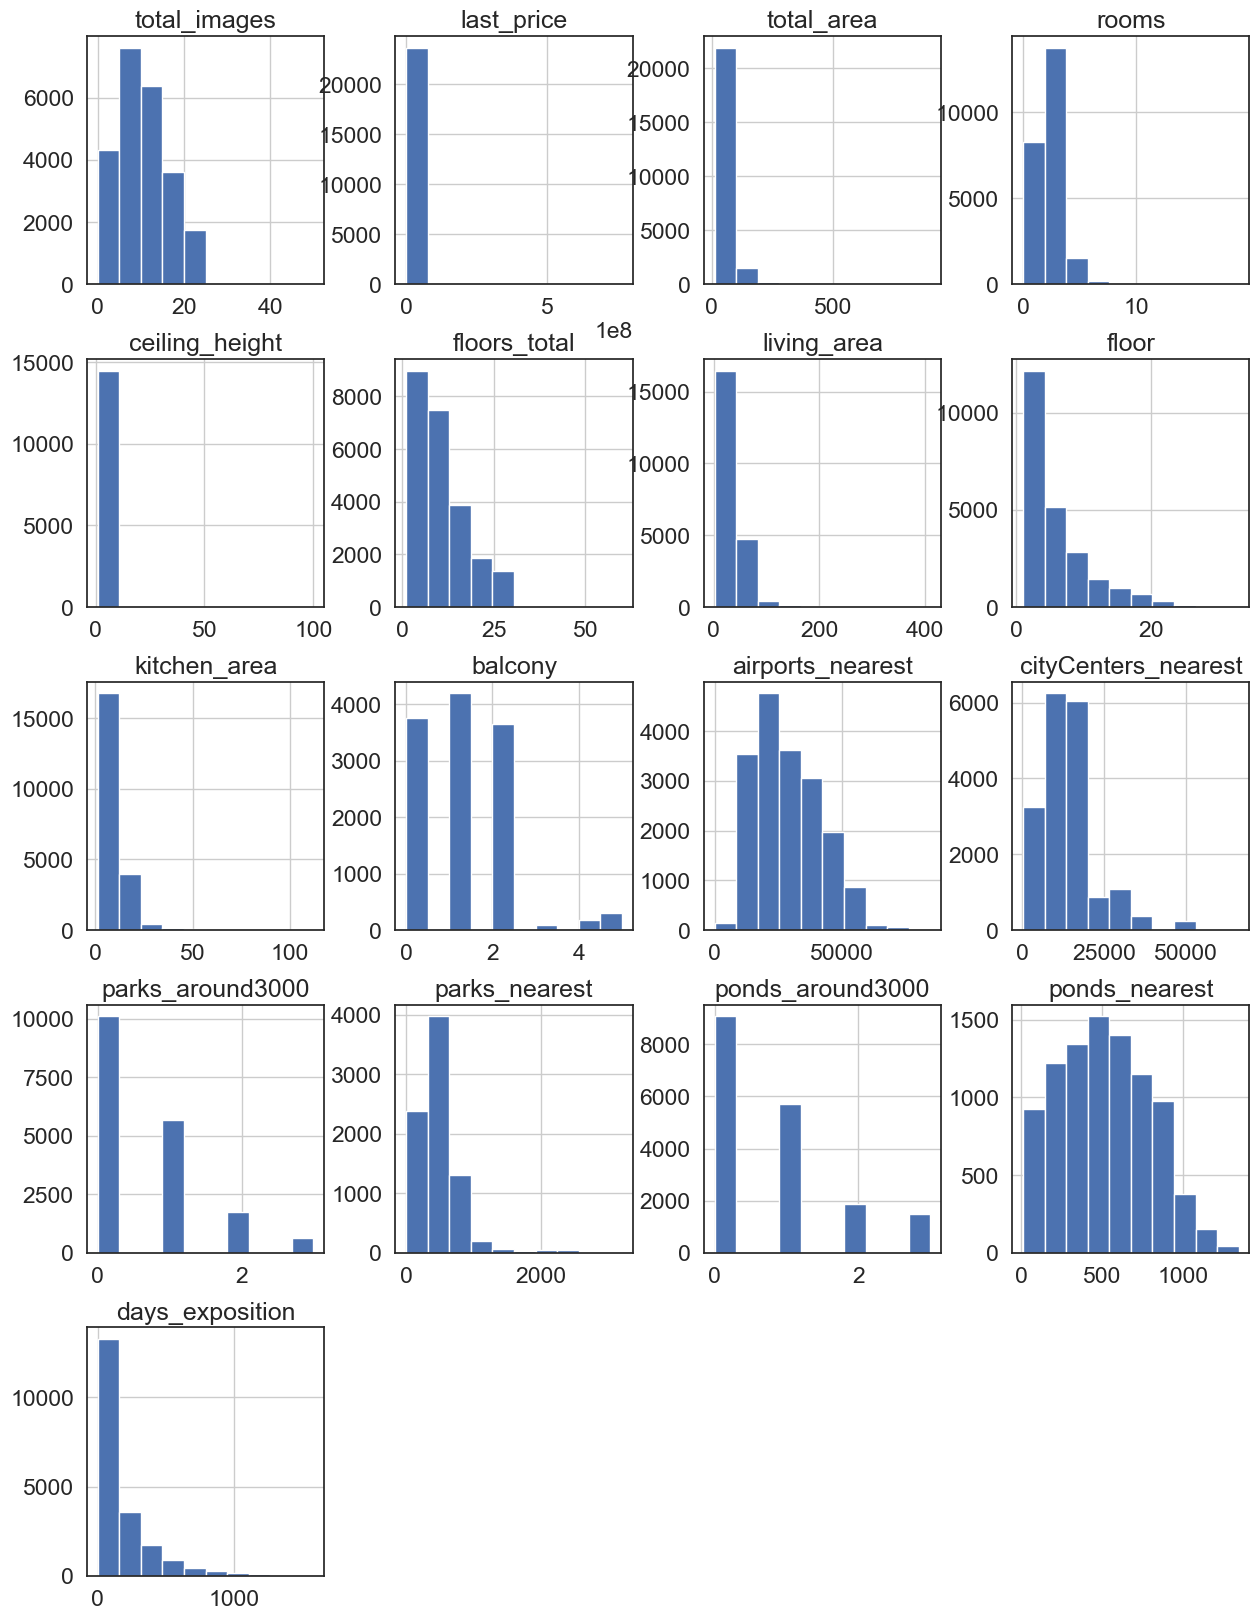

In [169]:
df.hist(figsize=(15, 20));# построим гистограммы для числовых колонок

**Минивывод:**

Гистограммы позволяют нам сказать о качестве полученных данных, есть ли аномальные значения (выбросы), на которые в дальнейшем надо обратить внимание. 
Например, стоимость квартиры: основная масса данных укладывается в диапазоне до 1*10 в степени 8, т.е. до 100 млн рублей. Однако, по графику мы видим, что существуют и такие данные, где стоимость равна 8*10 в степени 8. Что ялвяется аномальным значением.
    Также аномалии отмечены в столбце - высота потолка (мы видим, что в данных есть высота потолка 100 метров).
    Площадь кухни более 100 м, также можно отнести к аномальным значениям. 
    Продолжительность продажи в течение 1000 - 1500 дней, скорее всего аномалия. 
    Так же для СПб и области не характерны небоскребы, высотой более 60 этажей, что мы увидели по графику этажности дома.
    Вероятно, необходимо тщательней проанализировать столбец с количеством комнат, т.к. более 16 комнат не характерно для квартир.
    Общая площадь квартиры более 800 метров скорее всего будет считаться аномальным значением или после анализа может быть исправлена на 80, т.к. может быть расценена как человеческий фактор.


### Проверяем количество пропусков в данных

In [170]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Проверяем количество дубликатов в данных

In [171]:
df.duplicated().sum()

0

### Проверяем пропуски 

в столбце высота потолка "ceiling_height". Тип данных float

In [172]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Вероятно, заполнено пользователем или выгруженны данные не корректные. 
Как правило, в типовых квартирах высота потолков стандартная и колеблется от 2,7 до 3,2 м. У нас нет разделения по типу дома, поэтому будем все квартиры считать типовыми.
Можно заменить все пропуски на медианное значение. 

Подсчитаем его

In [173]:
df['ceiling_height'].median()

2.65

Заменим пропуски на медианное значение

In [174]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

### Проверим столбец "жилая площадь" по тем же параметрам

Пропуски составляют 8% от всех данных по этому столбцу. С одной стороны, мы должны заполнять пропуски в зависимости от количества комнат, с другой стороны, поцент пропусков не слишком большой, поэтому мы можем также использовать медианное значение. Т.к. по данным анализа количества комнат, мы видим разброс от1 до 12, в том числе, 197 объявлений отметили 0 комнат, что м.б. связано с определением помещения как "студия", где не выделяют жилую площадь отдельно.

In [175]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [176]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


Поскольку нельзя просто заменить пропуски на медиану или среднее значение, подсчитаем коэффициент для площади, как отношение жилой площади к общей.
    Если в столбце жилой площади будет пропуск, этот коэффициент будет учитываться и подставлять значение вместо пропуска. 


In [177]:
k_area = df[df['living_area'].isnull() == False]['living_area'].mean() / df['total_area'].mean()

In [178]:
df['living_area'] = df['living_area'].fillna(df['total_area']*k_area)

### Еще одним критическим моментом при покупке/продаже квартиры обычно площадь кухни. 

Аналогично поступим и в ситуации с площадью кухни.

In [179]:
k_kitchen = df[df['kitchen_area'].isnull() == False]['kitchen_area'].mean() / df['total_area'].mean()

In [180]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*k_kitchen)

### Наличие балкон  - очень важный параметр. Обычно, если не указанно в данных, значит балкона нет. Заменим пропуски в этом столбце на 0.

In [181]:
df['balcony'] = df['balcony'].fillna(0)

### Параметры parks_nearest и ponds_nearest

Параметры **parks_nearest и ponds_nearest** - важны для оценки местоположения помещения, однако пропуски в наших данных составляют более 60%, поэтому заполнять средним или медианным значением, значит сильно исказить данные. Скорее всего, там также, как и в случае с балконами их просто нет, поэтому заменим на 0.

In [182]:
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

### Параметры близости аэропорта, к центру и наличия водоемов

Пропуски в значениях **близости аэропорта, центра города и водоема в округе 3 км** составляют около 23%. Тем самым мы также не можем их игнорировать, заменить на медиану допустимо, т.к. вероятно, что пропуск в данных обусловлен незнанием владельца квартиры данных расстояний, причем скорее всего это не критические показатели. Т.к. если это принципиальное решение - жилье близко к центру или аэропорту, владельцы указывают на это преимущество/недостаток, а не оставляют пропуск в данных. Заменим их на медианы.


In [183]:
df['cityCenters_nearest'].median()

13098.5

In [184]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())

In [185]:
df['airports_nearest'].median()

26726.0

In [186]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())

In [187]:
df['parks_around3000'].median()

0.0

В данном случае, проставляем 0 вместо пропусков, т.к. средняя будет дробным числом, что не соответствует логике - парк или есть, или его нет.

In [188]:
df['parks_around3000'] = df['parks_around3000'].fillna(df['parks_around3000'].median())

In [189]:
df['ponds_around3000'].median()

1.0

In [190]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(df['ponds_around3000'].median())

**Заменять данные в days_exposition нельзя. Поэтому оставим в таком виде.**

### Проверим столбцы с булевыми значениями на пропуски

In [191]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Заменим в столбце is_apartment пропуски на 0, т.е. это НЕ апартаменты. Т.о. апартаменты у нас будут отображаться как = 1(True).

In [192]:
df['is_apartment'] = df['is_apartment'].fillna(0)

In [193]:
df['is_apartment'] = df['is_apartment'].astype('bool')

### Удалим строки, где в столбце locality_name отсутствует значение. 

Это один из ключевых факторов - месторасположение объекта. Без него не имеет смысла оценивать стоимость жилья. Таких строк немного - 49. 
Перезаписываем наш ДФ, в нем теперь 23650 строк.

In [194]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

### Проверим еще раз все ли столбцы содержат нужный тип данных

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Изменим тип даных:

в столбце first_day_exposition, т.к. должны быть с типом **datetime**. 

In [196]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

Данные в категориях **balcony, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** должны быть целыми числами. Поэтому заменим дробный тип на целые числа.


In [197]:
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['parks_nearest'] = df['parks_nearest'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['ponds_nearest'] = df['ponds_nearest'].astype('int')

## Проверяем неявные дубликаты в столбце с названиями locality_name

In [198]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

### Для удаления неявных дубликатов используем переименование до Названия, без префиксов

In [199]:
df['locality_name'] = df['locality_name'].replace(
    ['посёлок ', 'городской посёлок ', 'деревня ',
     'поселок городского типа ', 'имени ','поселок ',
     'садовое товарищество ', 'село ','посёлок городского типа ',
     'посёлок при железнодорожной станции ', 'коттеджный ',
     'станции ', 'при железнодорожной станции ',
     'садоводческое некоммерческое товарищество ',
     'коттеджный посёлок ', 'городского типа ', 'городской ', 'городского типа имени ',], '', regex=True)

### Проверяем снова названия в столбце locality_name

In [200]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

### Подсчитываем количество помещений по местоположению

In [201]:
df['locality_name'].value_counts()

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Алексеевка             1
Белоостров             1
Пельгора               1
Каложицы               1
Дзержинского           1
Name: locality_name, Length: 307, dtype: int64

Мы видим, что у нас 307 населенных пунктов с различным количеством помещений на продажу. 

### Промежуточный вывод:
- Мы проанализировали предоставленный ДФ на предмет пропусков данных и избавились в тех столбцах, где посчитали логически верным. 
- Избавились от неявных дубликатов в названиях местоположения продаваемых помещений.
- Проверили данные по типу и изменили тип данных, где это было необходимо (даты, целые числа и т.д.)
- Определили количество населенных пунктов, где представлены помещения для продажи.

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Проверим, какой процент данных мы удалили в процессе предобработки данных. 
    Изначально наш ДФ содержал 23699 строк, после предобработки данных у нас осталось 23650 строк.
    23650/23699 = 0,997
    Т.о. после продобработки данных мы удалили 0,3% данных. Такое количество потерь приемлемо.  

## Добавляем новые столбцы в ДФ

### Цена одного квадратного метра ('cost_meter')

(частное стоимости объекта и его общей площади, округленное до сотых)

In [203]:
df_filtered = df.copy()# перезапишем исправленный ДФ в новый ДФ перед добавлением новых столбцов

In [204]:
df_filtered['cost_meter'] = (df_filtered['last_price'] / df_filtered['total_area']).round(2)

In [205]:
df_filtered['cost_meter'] 

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23645     72490.85
23646     52542.37
23647     44091.71
23648    149511.40
23649     41795.67
Name: cost_meter, Length: 23650, dtype: float64

### Добавляем столбец с днями недели от 0 - понедельник, до 6 - воскресенье ('day_week'), месяца ('month') и года ('year') публикации объявления.

In [206]:
df_filtered['day_week'] = df_filtered['first_day_exposition'].dt.weekday

In [207]:
df_filtered['month'] = df_filtered['first_day_exposition'].dt.month

In [208]:
df_filtered['year'] = df_filtered['first_day_exposition'].dt.year

In [209]:
df_filtered # проверяем добавление столбца с днями недели

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_meter,day_week,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1,482,2,755,NaN,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,18603.0,0,0,0,0,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,13933.0,1,90,2,574,558.0,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,90.785766,9,False,...,6800.0,2,84,3,234,424.0,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098.0,2,112,1,48,121.0,100000.00,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23645,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,4232.0,1,796,3,381,NaN,72490.85,1,3,2017
23646,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,...,13098.5,0,0,1,0,45.0,52542.37,0,1,2018
23647,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,...,13098.5,0,0,1,0,NaN,44091.71,6,2,2018
23648,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.822689,12,False,...,10364.0,2,173,3,196,602.0,149511.40,1,3,2017


### Добавляем столбец "тип этажа квартиры" в зависимости от этажности дома (значения — «‎первый», «последний», «другой»)

In [210]:
def floor_type (row): # рассчитываем тип этажа
    if row['floor'] == 1: # сравниваем со значением в столбце'floor'
        return 'первый'
    if row['floor'] == row['floors_total']: # сравнивает с максимальной этажностью в доме
        return 'последний'
    return 'другой'


In [211]:
df_filtered['floor_type'] = df_filtered.apply(floor_type, axis=1)

In [212]:
# проверим, что функция отработала правильно
df_filtered[['floor', 'floors_total', 'floor_type']].sample(10)

,floor,floors_total,floor_type
15302,2,5.0,другой
17984,1,5.0,первый
11183,1,9.0,первый
20661,6,10.0,другой
2390,22,NaN,другой
2912,5,5.0,последний
23079,3,3.0,последний
10139,10,10.0,последний
10263,4,5.0,другой
5993,13,17.0,другой


### Переводим расстояние до центра города в километры

(переведите из м в км и округлите до ближайших целых значений)

In [213]:
df_filtered['cityCenters_nearest'] = (df_filtered['cityCenters_nearest'] / 1000).round()

In [214]:
df_filtered['cityCenters_nearest'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenters_nearest, dtype: float64

 ### Проверяем таблицу с добавлением новых столбцов


In [215]:
df_filtered.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_meter,day_week,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1,482,2,755,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0,0,0,0,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,1,90,2,574,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.785766,9,False,...,2,84,3,234,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2,112,1,48,121.0,100000.00,1,6,2018,другой


In [216]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Проверяем, все ли наши действия привели к желаемому результату:
    - новые столбцы добавлены;
    - дата написана правильно;
    - пропуски заполнены, кроме одного столбца, как и запланировано;
    - удалены ненужные строки с данными.

## Исследовательский анализ данных

#### Построим гистограммы для ряда параметров:
- общая площадь

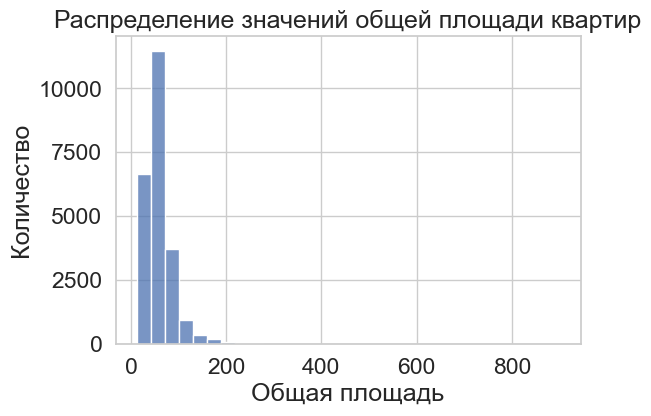

In [217]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['total_area'], bins=30)
plt.xlabel("Общая площадь")
plt.ylabel("Количество")
plt.title("Распределение значений общей площади квартир");

Проанализируем данные исходя из полученной гистограммы:
Форма распределения: гистограмма ассиметричная, с ассимметрией в правой части, значит данные сосредоточены в левой части.
Пики и моды: гистограмма имеет один пик - и два небольших пика с обеих сторон от максимального пика. Практически все данные укладываются до 200 м кв, однако существуют выпады (квартиры до 800 кв.м). Можно сказать, что наибольшее число представленных квартир имеют общую площадь от 50 до 100 кв.м и самое большое количество примерно 50-75 кв.м. 

#### Проанализируем столбец на аномальные значения.

Определим максимальную и минимальную площади квартир

In [218]:
df_filtered['total_area'].max()

900.0

In [219]:
df_filtered['total_area'].min()

12.0

Отфильтруем и подсчитаем квартиры с площадью более 300 м и менее 20 м

In [220]:
df_filtered.loc[df_filtered.loc[:,'total_area'] > 300]['total_area'].count()

61

In [221]:
df_filtered.loc[df_filtered.loc[:,'total_area'] < 20]['total_area'].count()

27

Эти квартиры составляют менее 0,3% от общего числа объявлений. Думаю, что мы можем не принимать в рассчет это квартиры, т.к. они могут вносить ненужный разброс данных. Удалим их из ДФ.

In [222]:
df_filtered.drop(df_filtered[df_filtered['total_area'] > 300].index, inplace=True)

In [223]:
df_filtered.drop(df_filtered[df_filtered['total_area'] < 20].index, inplace=True)

#### Таким образом, мы проанализировали столбец с общей площадь, узнали, что основная масса объявлений, у которых общая площадь квартир в пределах от 50 до 100 с пиком в области 50-75 кв.м. Аномальные значения (квартиры менее 20 кв.м. и более 300 кв.м. - которые являются уникальными на рынке и не подходят для среднестатистического анализа, и составили менее 0,4% от всех объявлений) мы удалили. 

- жилая площадь

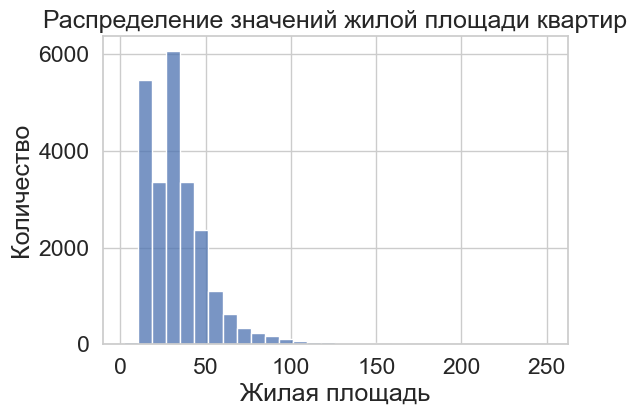

In [224]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['living_area'], bins=30)
plt.xlabel("Жилая площадь")
plt.ylabel("Количество")
plt.title("Распределение значений жилой площади квартир");

Проанализируем полученные данные: гистограмма имеет один пик, ассимметричная вправо, значит смещение данных в левую сторону. Большинство данных укладываются до 100 кв.м., что соответствует данным об общей площади квартир. Имеются выпады, где жилая площадь составляет 250 кв.м
Наибольшая частота показана для объявлений с заявленной жилой площадью от 15 м и от 25 кв.м. Эти данные логичны, т.к. разрыв между жилой и общей связан с тем, что именно включают в понятие жилой  площади (это только гостиные и спальни). Ни коридоры, ни кухни, ни балконы\кладовки не включаются.

#### Проанализируем столбец на аномальные значения.

In [225]:
df_filtered['living_area'].max()

250.0

In [226]:
df_filtered['living_area'].min()

2.0

Отфильтруем и подсчитаем квартиры с жилой площадью более 250 м и менее 10 м

In [227]:
df_filtered.loc[df_filtered.loc[:,'living_area'] > 250]['living_area'].count()

0

In [228]:
df_filtered.loc[df_filtered.loc[:,'living_area'] < 10]['living_area'].count()

24

Вероятнее всего, 31 квартира с жилой площадью менее 10 м кв это также уникальное жилье, типа крошечной комнаты в коммуналке, которое не имеет смясла включать в рассчет параметров среднестатистического жилья. 
Мы также можем удалить эти строки из ДФ.

In [229]:
df_filtered.drop(df_filtered[df_filtered['living_area'] < 10].index, inplace=True)

#### Таким образом, мы проанализировали данные по столбцу "жилая площадь" и выяснили, что были выбросы на уровне значений от 2 до 10. Квартир, где жилая площать более 250 м нет, тк мы уже отфильтровали ДФ по общей площади.

- высота потолков

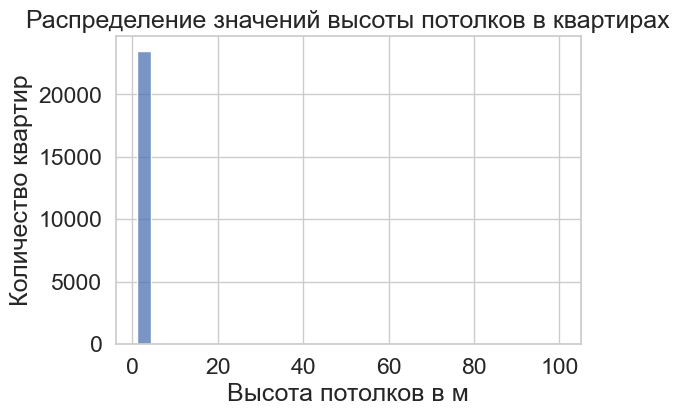

In [230]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['ceiling_height'], bins=30)
plt.xlabel("Высота потолков в м")
plt.ylabel("Количество квартир")
plt.title("Распределение значений высоты потолков в квартирах");

In [231]:
df_filtered['ceiling_height'].max()

100.0

In [232]:
df_filtered['ceiling_height'].min()

1.0

In [233]:
df_filtered.loc[df_filtered.loc[:,'ceiling_height'] > 5]['ceiling_height'].count()

34

In [234]:
df_filtered.loc[df_filtered.loc[:,'ceiling_height'] < 2]['ceiling_height'].count()

3

Проверим много ли выпадов в столбце.    

In [235]:
df_filtered['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.3 ,   2.71,
         4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,   3.5 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.  ,   2.79,   2.95,
         4.06,   2.94,   3.82,   3.54,   3.53,   2.83,   4.7 ,   2.4 ,
         3.38,   3.01,   3.65,   3.18,   3.35,   2.3 ,   3.57,   2.48,
         2.62,   2.82,   3.98,   2.63,   3.83,   3.52,   3.95,   3.75,
         2.88,   3.67,   3.87,   3.66,   3.85,   4.19,   3.24,   4.8 ,
         4.5 ,   4.2 ,   3.36,   3.86,  32.  ,   3.08,   3.68,   3.07,
         3.37,   3.09,   8.  ,   3.16,   3.26,   3.34,   2.81,   3.44,
      

In [236]:
for value in df_filtered['ceiling_height']:
     if value >= 6:
        df_filtered['ceiling_height'] = df_filtered['ceiling_height'].replace({value: value/10})

После проведения анализа, мы можем сделать вывод, что из данных следует исключить квартиры, в которых высота потолка менее 2 метров и более 5 м, т.к. это уже не относится к типовому жилью, даже с учетом того, что это квартиры в большинстве своем в СПб.

In [237]:
df_filtered.drop(df_filtered[df_filtered['ceiling_height'] < 2].index, inplace=True)

In [238]:
df_filtered.drop(df_filtered[df_filtered['ceiling_height'] > 6.5].index, inplace=True)

Почистили ДФ и убрали все квартиры, в которых потолки менее 2 метров и более 6,5 м.  

#### Мы избавились от пропусков, заменив двузначные числа, типа 25 или 32, на 2,5 или 3,2 (т.е. разделили на 10, приняв это как техническую ошибку). Затем мы  удалили выпады (квартиры, потолки в которых менее 2 м или более 6,5 м.
Еще раз подчеркну, как правило, если продается уникальное жилье, с высокими потолками, или огромной площадью, то, во-первых,  продавец внимательно заполняет эти уникальные пункты и не допускает пропусков данных, а во-вторых, такие уникальные квартиры из наших рассчетах наоборот необходимо убирать, т.к. они будут вносить перекосы в стреднестатистические показатели.
Поэтому удаляем такие квартиры из ДФ. Доля их совершенно не велика, поэтому выборка не пострадает.

- цена объекта

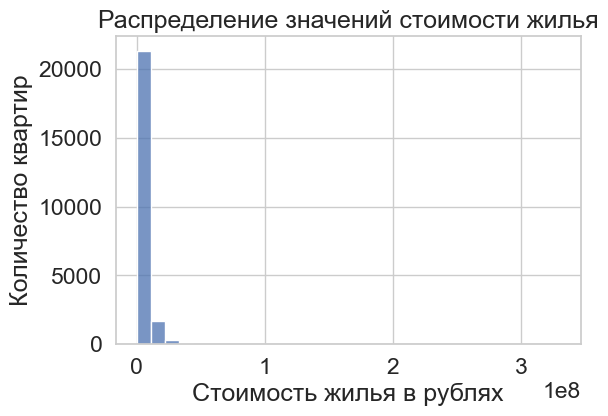

In [239]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['last_price'], bins=30)
plt.xlabel("Стоимость жилья в рублях")
plt.ylabel("Количество квартир")
plt.title("Распределение значений стоимости жилья");   

#### Оценим данный столбец с помощью метода describe()

In [240]:
df_filtered['last_price'].describe()

count    2.352700e+04
mean     6.304771e+06
std      7.739719e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.630000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

#### Мы видим, что в 25% объявлений стоимость меньше или равна 3,4 млн., а еще у 25% стоимоть больше 6,75 млн. Чтобы отсечь совсем дешевые и очень дорогие квартиры, которые оказываются выбросами для наших данных, уберем квартиры менее 500 тысяч и более 
подсчитаем межквартильный интервал: q3-q1=6.75-3.4 = 3.35
3.35*1.5=5.0 - размах усов. Т.е. 3,4-5=все значения попадают и не являются выбросами
6.75+5 = 11.75 - все квартиры стоимостью больше 11,75 млн уже считаются выбросами. Подсчитаем их количество. 

In [241]:
df_filtered.loc[df_filtered.loc[:,'last_price'] > 11750000]['last_price'].count()

2018

In [242]:
df_filtered.drop(df_filtered[df_filtered['last_price'] < 500000].index, inplace=True)

2 тысячи объявлений в выборке из 24 тысяч это 8%, поэтому удалить их из ДФ было бы связано с потерей данных. По-видимому, это не случайные выбросы, а закономерный разброс цен на недвижимость, в наших данных.

Удалим аномально дешевые квартиры, но аномально дорогие оставим.

- количество комнат

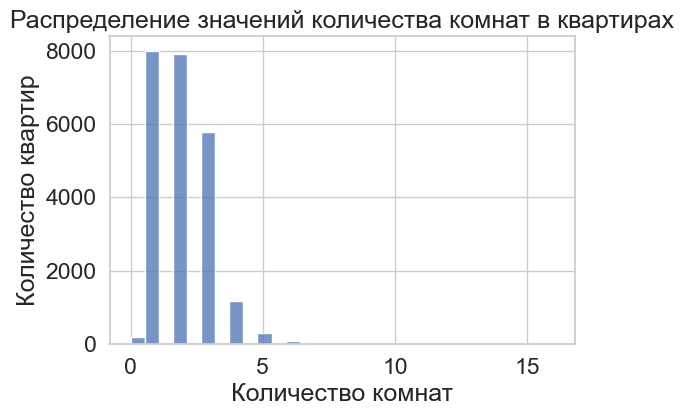

In [243]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['rooms'], bins=30)
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир")
plt.title("Распределение значений количества комнат в квартирах");  

В данном столбце отражено точное количество комнат, можно отметить, что примерно поровну представлены квартиры с 1 и 2 комнатами, немного меньше с 3 комнатами. Так же есть объявления, где количество комнат обозначено как 0, вероятно, это квартиры-студии, где не принято выделять отдельные комнаты.

Оставим данный столбец без изменений.

Удалим квартиры, в которых количество комнат более 6. 

In [244]:
df_filtered.drop(df_filtered[df_filtered['rooms'] > 6].index, inplace=True)

- тип этажа

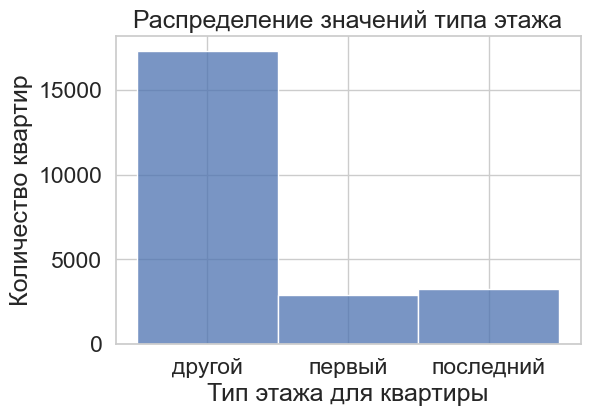

In [245]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['floor_type'], bins=30)
plt.xlabel("Тип этажа для квартиры")
plt.ylabel("Количество квартир")
plt.title("Распределение значений типа этажа");  

Отметим, что примерно поровну первых и последних этажей в ДФ, а основная масса находится в категории - другой.

#### Ничего менять не будем.

- общее количество этажей в доме

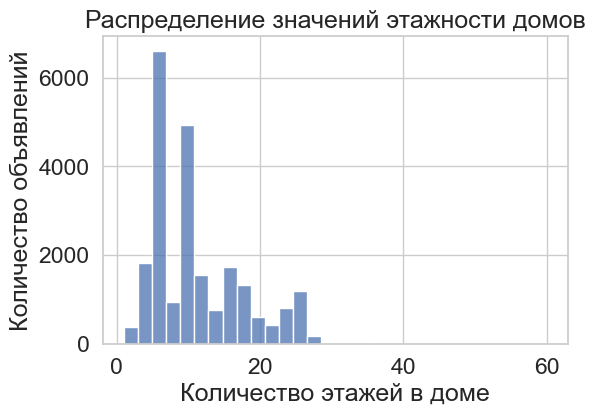

In [246]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['floors_total'], bins=30)
plt.xlabel("Количество этажей в доме")
plt.ylabel("Количество объявлений")
plt.title("Распределение значений этажности домов");

Данные распределились в два больших пика (5 и 9-10 этажей соответственно). Большинство начений укладывается в этажность до 30. Все 30 объявлений с этажностью более 30 и всего 4 - более 35 этажей.
#### Эти данные соверщенно не искажают нашу выборку, поэтому удалять их не будем.

Проверим уникальные значения в этом столбце.  

In [247]:
df_filtered['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

In [248]:
df_filtered.loc[df_filtered.loc[:,'floors_total'] > 40]['floors_total'].count()

2

Этажность в нашем случае не будет решающим фактором. квартиры всего 2, роли не сыграет в общем тренде, но удалять данные надо осторожно, поэтому не будем их удалять.   

- расстояние до центра города

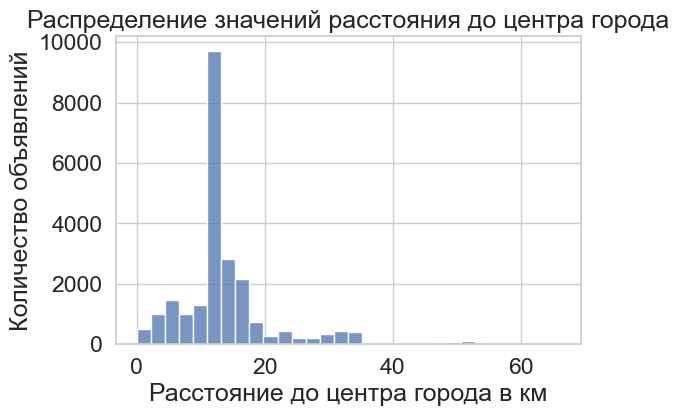

In [249]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['cityCenters_nearest'], bins=30)
plt.xlabel("Расстояние до центра города в км")
plt.ylabel("Количество объявлений")
plt.title("Распределение значений расстояния до центра города");

Гистограмма имеет один пик - примерно 12 км. Ярко выраженная ассиметрия в право, т.о. большинство значений укладывается в диапазон до 40 км,  основное тело гистограммы в диапазоне от 0 до 20 км от центра, но есть и отдельные значения на уровне 50 км. 
Эти данные логически нельзя рассматривать как выбросы, т.к. расстояние не может быть каким то не типичным или ошибочным, тут главное, что определить центром и до куда считать расстояние.
#### Оставляем все данные.

- расстояние до парка

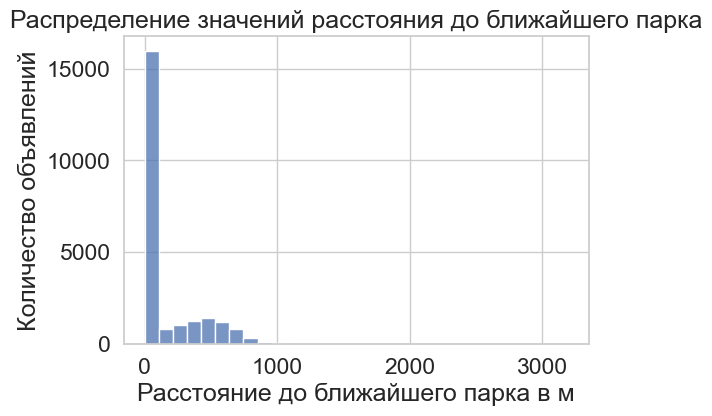

In [250]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['parks_nearest'], bins=30)
plt.xlabel("Расстояние до ближайшего парка в м")
plt.ylabel("Количество объявлений")
plt.title("Распределение значений расстояния до ближайшего парка");

Гистограмма имеет один ярко выраженный пик на уровне 0, т.е. поблизости парка нет вообще. И еще один подъем на уровне 500 м. 

Выбросов так же быть не может, т.к. это расстояние.

 - площадь кухни   

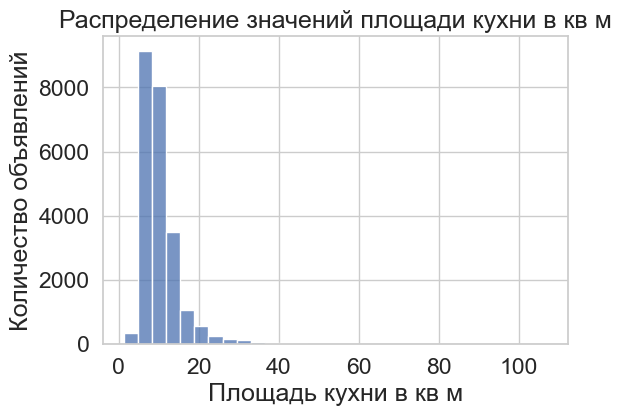

In [251]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['kitchen_area'], bins=30)
plt.xlabel("Площадь кухни в кв м")
plt.ylabel("Количество объявлений")
plt.title("Распределение значений площади кухни в кв м");

Гистограмма имеет пиковое значение в диапазоне от 5,5 до 10 кв м. БОльшинство значений укладываются в районе до 30 кв м. Однако есть и выбросы - более 100 кв м. 
Удалим значения, в которых площадь кухни более 50 кв.м.

In [252]:
df_filtered.loc[df_filtered.loc[:,'kitchen_area'] > 50]['kitchen_area'].count()

36

In [253]:
df_filtered.drop(df_filtered[df_filtered['kitchen_area'] > 50].index, inplace=True)

Проверим насколько уменьшилось количество данных после корректировки по выбросам.

In [254]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23415 entries, 0 to 23649
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23415 non-null  int64         
 1   last_price            23415 non-null  float64       
 2   total_area            23415 non-null  float64       
 3   first_day_exposition  23415 non-null  datetime64[ns]
 4   rooms                 23415 non-null  int64         
 5   ceiling_height        23415 non-null  float64       
 6   floors_total          23330 non-null  float64       
 7   living_area           23415 non-null  float64       
 8   floor                 23415 non-null  int64         
 9   is_apartment          23415 non-null  bool          
 10  studio                23415 non-null  bool          
 11  open_plan             23415 non-null  bool          
 12  kitchen_area          23415 non-null  float64       
 13  balcony         

В исходном ДФ было 23699 строк, сейчас 23426, в процессе удаления аномальных значений мы уменьшили ДФ на 1,2%. Допустимо уменьшение ДФ на 5%, т.о. наш ДФ подходит для дальнейшего анализа.    

## Как быстро продавались квартиры

Мы помним, что в данном столбце было много пропусков в данных и мы оставили их так, однако при анализе сейчас нам нужно заменить NaN, на 0, что бы посмотреть распределение на графиках.

In [255]:
df_filtered['days_exposition'] = df_filtered['days_exposition'].fillna(0) 

In [256]:
df_filtered['days_exposition'].head(10)

0      0.0
1     81.0
2    558.0
3    424.0
4    121.0
5     55.0
6    155.0
7      0.0
8    189.0
9    289.0
Name: days_exposition, dtype: float64

Построим гистограмму для столбца "days_exposition", чтобы посмотреть распределение данных

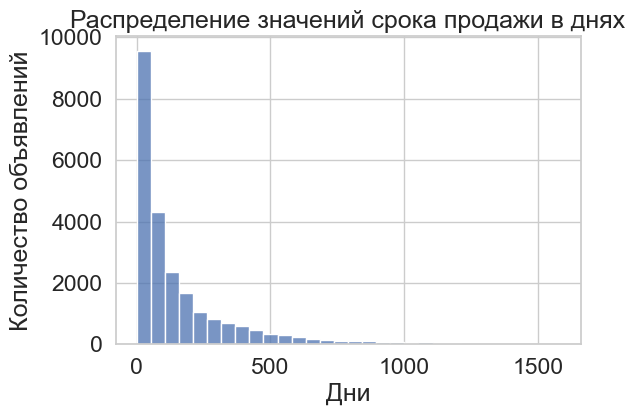

In [257]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_filtered['days_exposition'], bins=30)
plt.xlabel("Дни")
plt.ylabel("Количество объявлений")
plt.title("Распределение значений срока продажи в днях");

По графику мы видим, что есть большое количество значений в правой части, т.е. выбросы.
Построим диаграмму распределения для этого столбца, чтобы посмотреть на квартили, медиану и выбросы.

In [258]:
import seaborn as sns

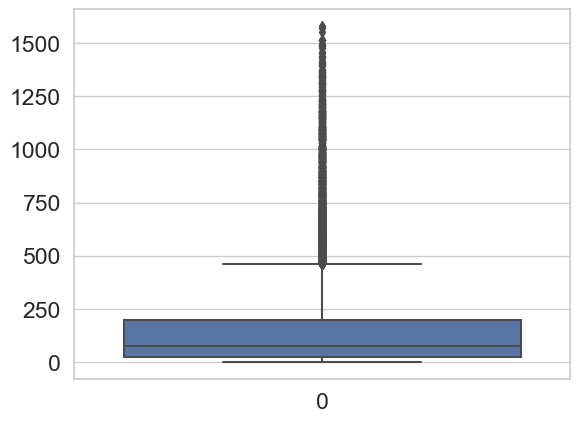

In [259]:
sns.boxplot(data=df_filtered['days_exposition']);

Рассчитаем медиану и квартили для данного столбца методом describe()

In [260]:
df_filtered['days_exposition'].describe()

count    23415.000000
mean       156.155798
std        213.157723
min          0.000000
25%         22.000000
50%         73.000000
75%        197.500000
max       1580.000000
Name: days_exposition, dtype: float64

Мы видим, что средняя продолжительность составляет 156 дней, медиана - 73 дня. Выбросы - все объявления, количество дней в которых больше чем 75%(198 дней) + стандартное отклонение(213 дней) = 411 дней.

Подсчитаем как много объявлений, которые провисели более 411 дней.

In [261]:
df_filtered.loc[df_filtered.loc[:,'days_exposition'] > 411]['days_exposition'].count()

2474

Почти 2,5 тысячи объявлений. Т.е. квартиры продавались более 1 года и надо прицельно смотреть в чем там проблема - например, завышена цена при наличии каких-то негативных факторов).

Рассмотрим непосредственно "пики", т.е. период от 0 до 200, на которые приходится наибольшее количество объявлений.

In [262]:
df_max = df.query('0 < days_exposition < 200')

Сделаем срез данных по сроку продажи от 0 до 200 дней и построим гистограмму распределения

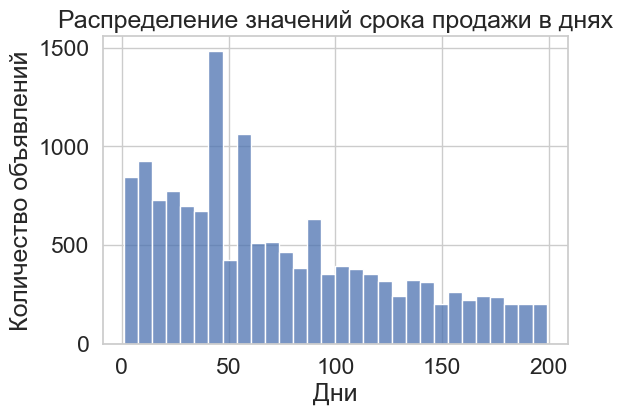

In [263]:
plt.figure(figsize=(6,4))
sns.set(style='whitegrid', font_scale=1.5)
sns.histplot(data=df_max['days_exposition'], bins=30)
plt.xlabel("Дни")
plt.ylabel("Количество объявлений")
plt.title("Распределение значений срока продажи в днях");

In [264]:
df_max['days_exposition'].describe()

count    14604.000000
mean        72.532114
std         52.162038
min          1.000000
25%         30.000000
50%         60.000000
75%        108.000000
max        199.000000
Name: days_exposition, dtype: float64

Исходя из полученных данных, мы можем сказать, что наибольшее число продаж квартир приходится на период около 40 дней (6 недель), т.е. полтора месяца со старта размещения. Затем еще один пик - на 2 месяца (как раз медианное значение), и последний пик - на 90 дней. Далее в этом диапазоне данных продажи идут примерно одинаково.
    
Т.е. небольшой вывод из полученных данных следующий: наибольшая вероятность продажи приходится на период от 1,5 до 3 месяцев с момента публикации.  

## Изучим зависимость стоимости жилья от некоторых параметров

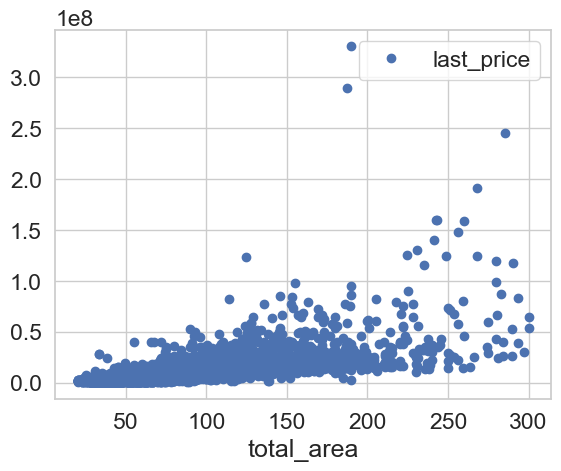

In [265]:
df_filtered.plot(x='total_area', y='last_price', style='o');

График имеет тенденцию к прямой зависимости стоимости от общей площади. Это в принципе, очевидный вывод.
Проверим зависимость от количества комнат, площади кухни, высоты потолков, этажа и даты публикации для продажи.

In [266]:
import seaborn as sns

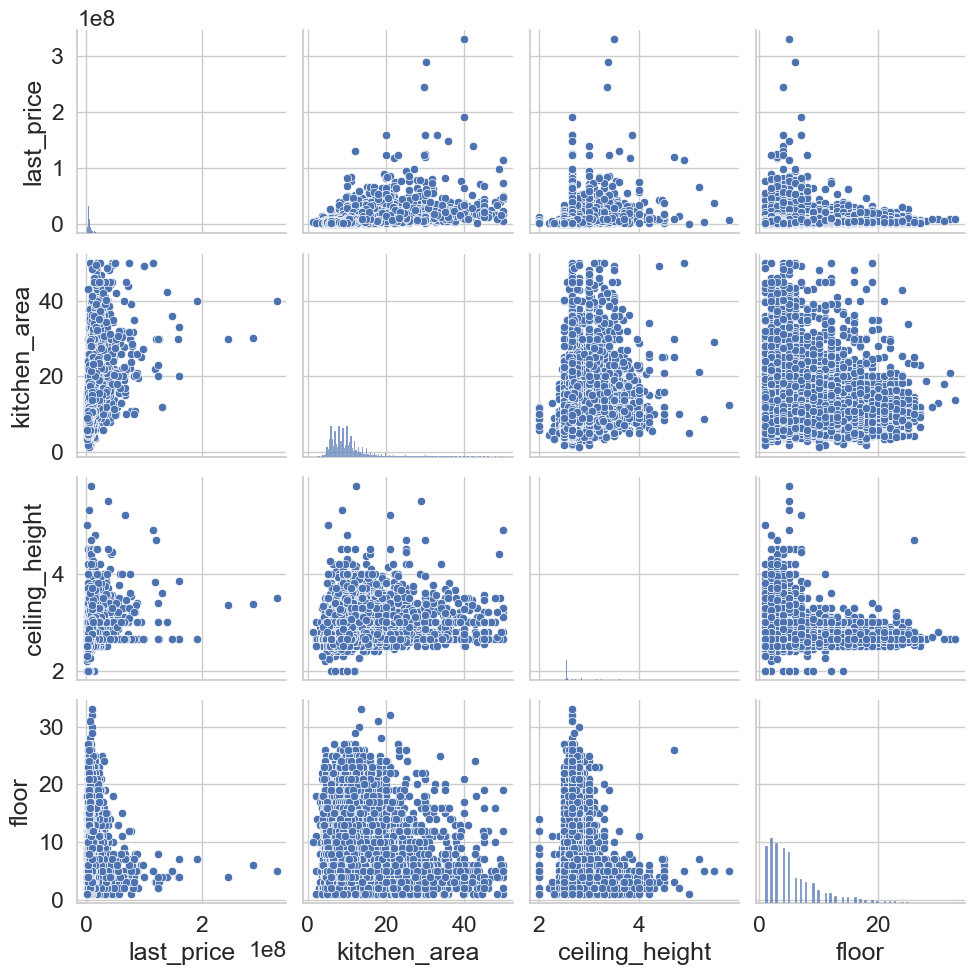

In [267]:
sns.pairplot(df_filtered[['last_price','kitchen_area', 'ceiling_height', 'floor']], diag_kind="hist")
plt.show()

Визуально анализируя полученные графики зависимости, можно отметить только прямую зависимость цены от площади кухни, хотя по графику эта зависимотть и не очень явная.

Подсчитаем коэффициент корреляции для этих же значений.

In [268]:
df_filtered[['last_price', 'total_area', 'kitchen_area', 'ceiling_height', 'floor']].corr()

,last_price,total_area,kitchen_area,ceiling_height,floor
last_price,1.000000,0.675929,0.513847,0.336245,0.032493
total_area,0.675929,1.000000,0.631407,0.387862,-0.024184
kitchen_area,0.513847,0.631407,1.000000,0.324463,0.129698
ceiling_height,0.336245,0.387862,0.324463,1.000000,-0.042915
floor,0.032493,-0.024184,0.129698,-0.042915,1.000000


Анализируя первый столбец корреляции стоимости от **колличественных** факторов (следует помнить, что данный метод считает корреляции по Пирсону) я бы сказала, что **определенно существует прямая зависимость цены от общей площади и от площади кухни.** 

Построим график зависимости стоимости от категориальных факторов (количество комнат, день, месяц и год размещения объявления

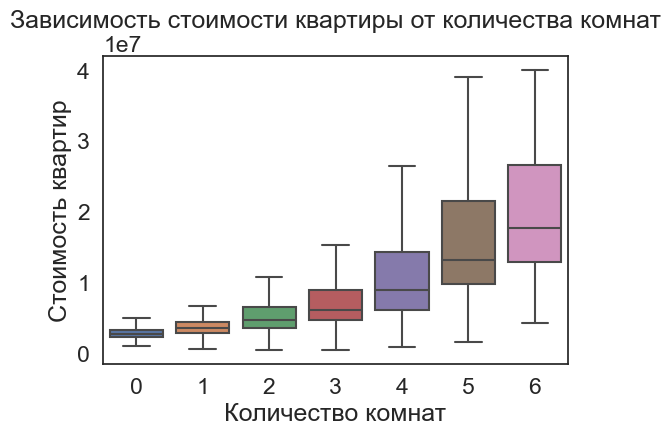

In [269]:
plt.figure(figsize=(6,4))
sns.set(style='white', font_scale=1.5)
sns.boxplot(data=df_filtered, x='rooms', y='last_price', showfliers=False)
plt.xlabel("Количество комнат")
plt.ylabel("Стоимость квартир")
plt.title("Зависимость стоимости квартиры от количества комнат");

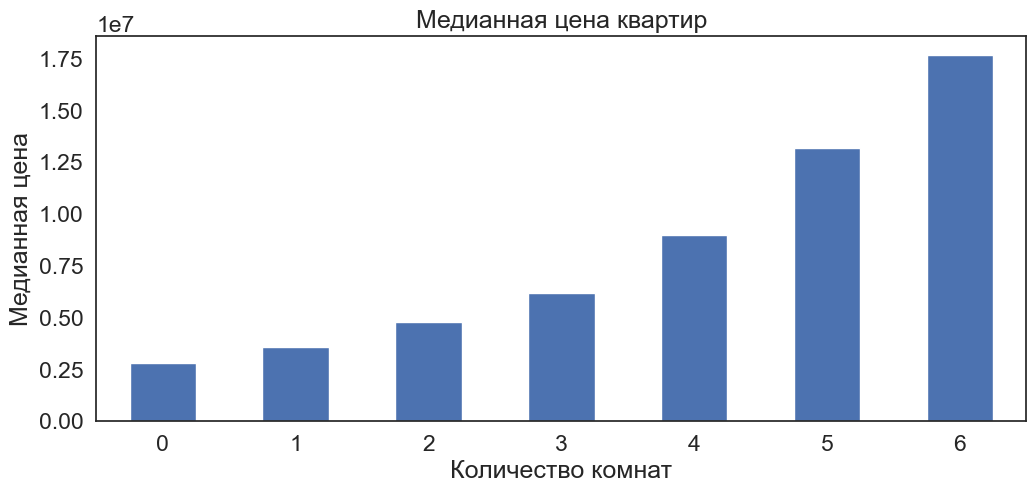

In [270]:
# сгруппируем квартиры по количеству комнат и посчитаем медианные цены для категорий
df_filtered_grouped = df_filtered.groupby('rooms')['last_price'].median().plot(kind = 'bar',
                                                                              rot = 0,
                                                                              title = 'Медианная цена квартир',
                                                                              xlabel = 'Количество комнат',
                                                                              ylabel = 'Медианная цена',
                                                                              figsize = (12, 5));

По данным мы видим прямую зависимость медианной стоимости квартиры от количества комнат в квартире.

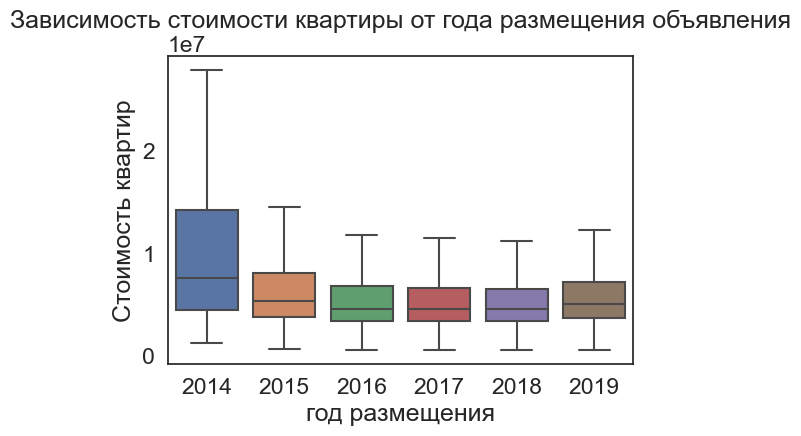

In [271]:
plt.figure(figsize=(6,4))
sns.set(style='white', font_scale=1.5)
sns.boxplot(data=df_filtered, x='year', y='last_price', showfliers=False)
plt.xlabel("год размещения")
plt.ylabel("Стоимость квартир")
plt.title("Зависимость стоимости квартиры от года размещения объявления");

По данным мы видим обратную зависимость года размещения от медианной стоимости квартиры. Кроме 2019 года, когда отмечается небольшое увеличение медианной стоимости. Т.о. можно сделать вывод, что в 2014 году было выгоднее продавать, чем в 2018. Рост стоимости начался в 2019, но на уровне 2015 года.   

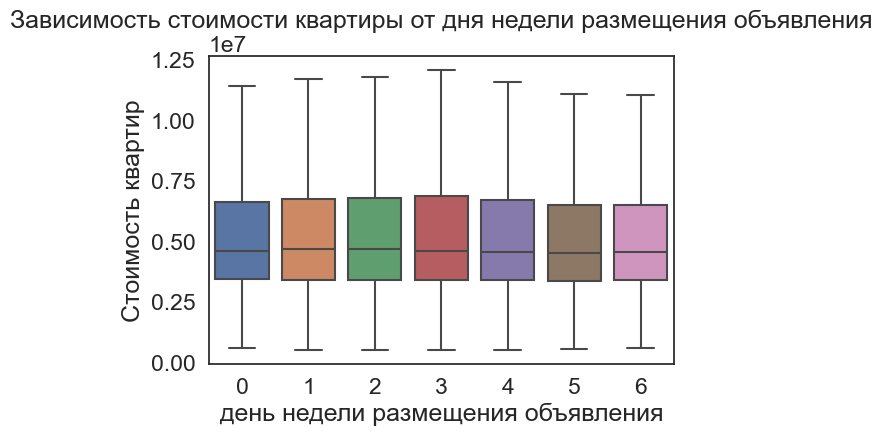

In [272]:
plt.figure(figsize=(6,4))
sns.set(style='white', font_scale=1.5)
sns.boxplot(data=df_filtered, x='day_week', y='last_price', showfliers=False)
plt.xlabel("день недели размещения объявления")
plt.ylabel("Стоимость квартир")
plt.title("Зависимость стоимости квартиры от дня недели размещения объявления");

По данным мы не видим зависимость между днем недели и стоимостью квартиры. Можно было бы посмотреть зависимость дня недели и срока продажи.

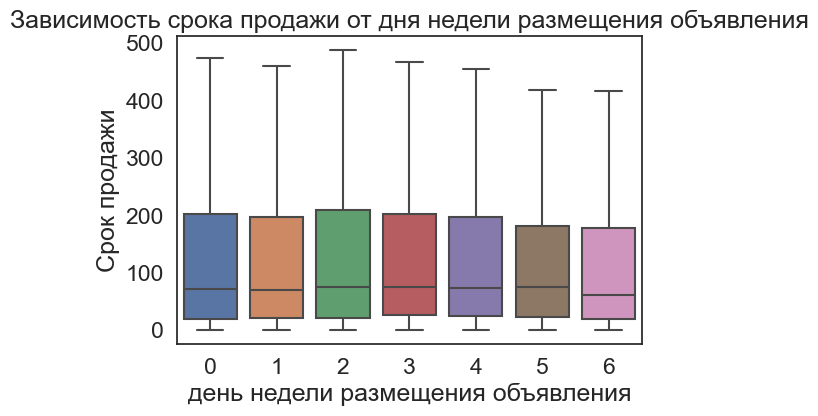

In [273]:
plt.figure(figsize=(6,4))
sns.set(style='white', font_scale=1.5)
sns.boxplot(data=df_filtered, x='day_week', y='days_exposition', showfliers=False)
plt.xlabel("день недели размещения объявления")
plt.ylabel("Срок продажи")
plt.title("Зависимость срока продажи от дня недели размещения объявления");

По данным мы не видим зависимость между днем недели и сроком продажи квартиры. Это логично, т.к. покупка квартиры не спонтанная покупка, поэтому время размещения объявления не так сильно влияет на скорость продажи

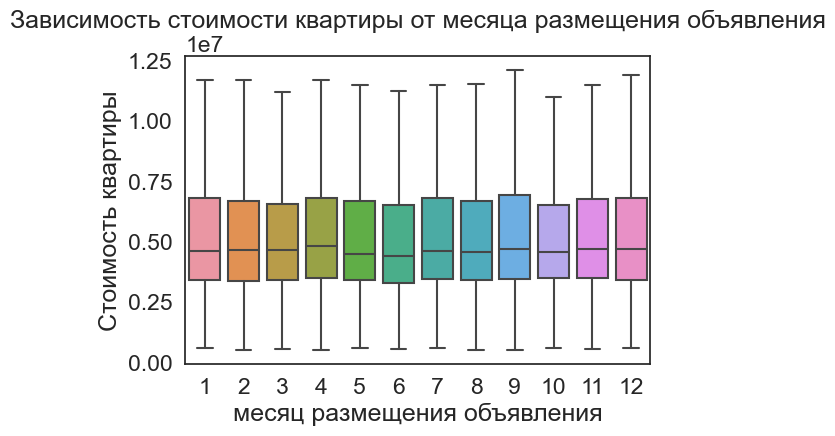

In [274]:
plt.figure(figsize=(6,4))
sns.set(style='white', font_scale=1.5)
sns.boxplot(data=df_filtered, x='month', y='last_price', showfliers=False)
plt.xlabel("месяц размещения объявления")
plt.ylabel("Стоимость квартиры")
plt.title("Зависимость стоимости квартиры от месяца размещения объявления");

По данным мы не видим зависимость между месяцем размещения и стоимостью квартиры. 

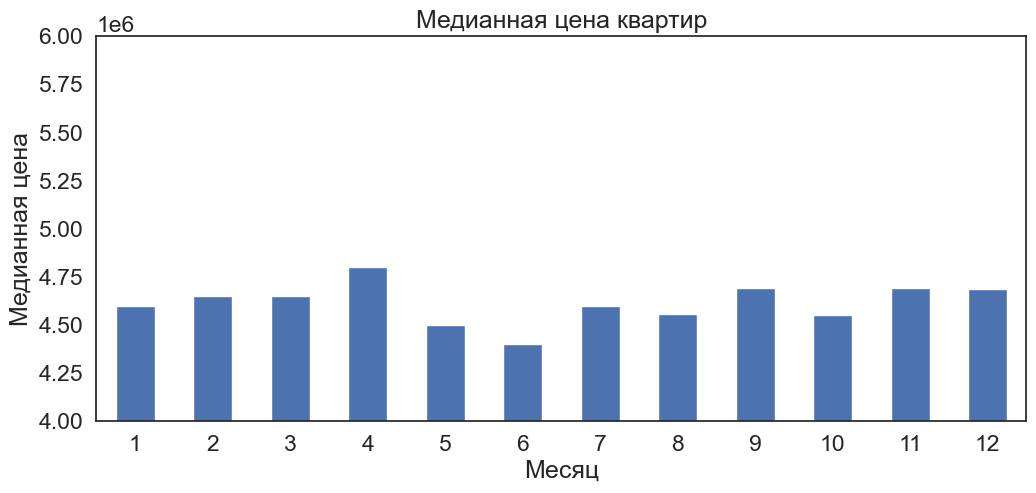

In [275]:
# однако если сравнивать медианные цены, то можно заметить сезонность
df_filtered_grouped = df_filtered.groupby('month')['last_price'].median().plot(kind = 'bar',
                                                                              rot = 0,
                                                                              title = 'Медианная цена квартир',
                                                                              xlabel = 'Месяц',
                                                                              ylabel = 'Медианная цена',
                                                                              figsize = (12, 5))
plt.ylim(4000000, 6000000)
plt.show()

**Минивывод:**
- После анализа зависимости стоимости квартиры от радя параметров, мы можем сказать, что существует прямая зависимость от площади квартиры и площади кухни. 
- Также отмечена прямая зависимость от количества комнат.
- Отмечена обратная зависимость стоимости от года размещения, т.е. в 2014 году квартиры продавались дороже, чем в 2018 году. Это может быть связано с факторами экономики, а не с параметрами квартир.  
- Есть сезонная зависимость стоимости квартиры от месяца или дня недели, если рассматривать медианные цены.   

### Посчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

Для подсчета нам необходимо сначала отсортировать ДФ по населенным пунктам и отобрать 10 самых популярных.

In [276]:
best = df_filtered['locality_name'].value_counts().head(10)

In [277]:
best

Санкт-Петербург    15521
Мурино               589
Кудрово              472
Шушары               438
Всеволожск           398
Пушкин               363
Колпино              337
Парголово            326
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

Получаем список 10 самых популярных населенных пунктов

In [278]:
best_list = list(best.index)
best_list

['Санкт-Петербург',
 'Мурино',
 'Кудрово',
 'Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'Парголово',
 'Гатчина',
 'Выборг']

Содадим ДФ, в котором будут только те строки, в которых значение в столбце 'locality_name' будут соответствовать 10 лидерам.

In [279]:
df_best = df_filtered[df_filtered['locality_name'].isin(best_list)]

Чтобы посчитать среднюю цену одного квадратного метра для каждого населенного пункта, напишем:

In [280]:
df_best.groupby('locality_name')['cost_meter'].mean().round(2).sort_values(ascending=False)

locality_name
Санкт-Петербург    113907.62
Пушкин             102883.85
Кудрово             95324.93
Парголово           90332.26
Мурино              86061.68
Шушары              78681.50
Колпино             75333.30
Гатчина             68746.15
Всеволожск          68654.47
Выборг              58141.91
Name: cost_meter, dtype: float64

Создадим сводную таблицу, в которой будут отобранные 10 населенных пунктов, количество поданных в них объявлений и средняя цена за квадратный метр

In [281]:
table_best = df_best.groupby('locality_name').agg({'cost_meter':"mean", "locality_name":"count"})

In [282]:
table_best.columns = ['mean_cost_meter','notice_count']

In [283]:
table_best['mean_cost_meter'] = table_best['mean_cost_meter'].round()

In [284]:
table_best = table_best.sort_values('notice_count',ascending=False)

In [285]:
table_best

,mean_cost_meter,notice_count
locality_name,,
Санкт-Петербург,113908.0,15521
Мурино,86062.0,589
Кудрово,95325.0,472
Шушары,78682.0,438
Всеволожск,68654.0,398
Пушкин,102884.0,363
Колпино,75333.0,337
Парголово,90332.0,326
Гатчина,68746.0,307


#### Вывод: самый дорогой средний квадратный метр в г.Санкт-Петербург (114 тысяч 245 рублей), самый дешевый из 10 отобранных - в Выборге (58 тысяч 142 рубля).

Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

In [286]:
StPeter = df_filtered[df_filtered['locality_name'] == 'Санкт-Петербург']

In [287]:
StPeter['cityCenters_nearest']

0        16.0
2        14.0
3         7.0
4         8.0
7        12.0
         ... 
23640    16.0
23641     6.0
23642     4.0
23645     4.0
23648    10.0
Name: cityCenters_nearest, Length: 15521, dtype: float64

Сгруппируем по расстоянию до центра города и выведем среднюю ценe за метр.

In [288]:
final_table = StPeter.groupby('cityCenters_nearest', as_index=False).agg({'cost_meter':"mean"})

In [289]:
final_table['cost_meter'] = final_table['cost_meter'].round()

In [290]:
final_table['cost_meter']

0     236242.0
1     176443.0
2     155402.0
3     121062.0
4     129947.0
5     137976.0
6     146747.0
7     154005.0
8     123838.0
9     113308.0
10    112906.0
11    108671.0
12    107497.0
13    109824.0
14    104195.0
15    104229.0
16    100467.0
17     96602.0
18     96392.0
19     98713.0
20    103057.0
21     94470.0
22     91330.0
23     92002.0
24     85737.0
25     91531.0
26     89286.0
27    132116.0
28     81162.0
29     72953.0
Name: cost_meter, dtype: float64

Создадим новую таблицу, в которой отразим данные по расстоянию от центра города (в км) и среднюю цену (в рублях) для каждого км.

In [291]:
final_table.columns = ['distance_center','mean_cost_m']

In [292]:
final_table

,distance_center,mean_cost_m
0,0.0,236242.0
1,1.0,176443.0
2,2.0,155402.0
3,3.0,121062.0
4,4.0,129947.0
5,5.0,137976.0
6,6.0,146747.0
7,7.0,154005.0
8,8.0,123838.0
9,9.0,113308.0


Построим стобчатый график зависимости средней стоимости квадратного и расстояния от центра.  

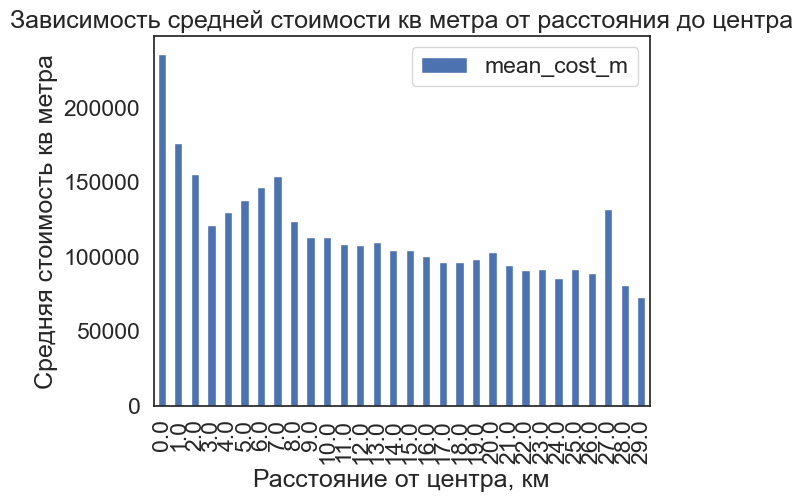

In [293]:
final_table.plot(kind='bar', x='distance_center', y='mean_cost_m');
plt.xlabel("Расстояние от центра, км")
plt.ylabel("Средняя стоимость кв метра")
plt.title("Зависимость средней стоимости кв метра от расстояния до центра");

 По графику мы видим, что существует обратная зависимость между расстояние от центра и ценой за кв.м. Т.е. чем ближе к центру, тем выше цена. 
 На графике также есть область значений (от 2,5 до 7,5 км), где эта зависимость не обратная, а наоборот, прямая. Т.е. с увелицением расстояния от центра, увеличивается цена. Вероятно, в эту зависимость внесены другие параметры (например, какая-то достопримечательность поблизости, или хорошая транспортная доступность). В любом случае, это параметр, которые не учтен в данном графике.

## Общий вывод исследования:

### Задачей данного исследования было провести анализ данных, который поможет установить параметры, влияющие на цену объектов.

1) По результатам анализа мы можем сказать, что основная масса объявлений имеет общую площадь квартир в пределах от 50 до 100, с пиком в области 50-75 кв.м. 
2) После анализа зависимости стоимость жилья от общей площади квартиры, площади кухни, этажа, высоты потолков и времени размещения объявления, можно сделать вывод, что **определенно существует прямая зависимость цены от общей площади и от площади кухни.** Все остальные вышеперечисленные факторы влияния на стоимость жилья не имеют.
Отдельно следует отметить год продажи квартиры, тут мы отмечаем обратную зависимость с 2014 по 1018 годы (т.е. с течением времени, стоимоть снижалась) и изменение тенденции в сторону повышения цены в 2019 году.
3) Отобрав 10 самых популярных населенных пунктов в данном регионе, можем сделать вывод что в наиболее популярном СПб стоимость квадратного метра (около 114 тысяч) в 2 раза выше, чем в самом дешевом (в ТОП-10) Выборге (58 тысяч).
4) Проведя анализ зависимости стоимости квадратного метра жилья от расположения квартиры от центра города, мы можем сделать вывод об обратной зависимости, т.е. чем дальше от центра, тем дешевле стоимость.

### Общий вывод исследования:
1. За время проведенной работы мы проверили структуру данных по ряду параметров, удалили аномальные значения данных, которые нельзя было адекватно изменить. Причем, потери данных в ДФ составили менее 5% от исходного.
2. Рассчитали новые данные: средняя стоимость квадратного метра, тип этажа, разделили дату публикации по году-месяцу-дню. 
3. Определили количество и список населенных пунктов(307), в которых продавались квартиры. 
4. Определили, что  наиболее часто продаются квартиры общей площадью от 50 до 75 кв.м., с жилой площадью 15-25 кв м и кухней в 5,5 метров; расположенные ни на первом, ни на последнем этажах, с высотой потолков примерно 2,8 м.
5. По расстоянию от центра города наибольшее число квартир находятся в 12 км, однако это было рассчитано для всех 307 населенных пунктов.
6. Нами было рассчитано, что самый высокий % продаж квартир приходится в первые полтора месяца после публикации объявления, затем пик приходится на 2 месяца и на 3 месяца. Медиана продаж квартир составляет 73 дня. День недели или месяц публикации объявления не влияет на его стоимость или срок прродажи. А вот год публикации обратно коррелирует со стоимостью, наилучший период покупки был в период с 2014 по 2018 годы, когда стоимость уменьшалась. с 2019 года стоимость жилья снова возобновила рост. 
7. Основными факторами, влияющими на стоимость жилья были признаны общая площадь и площадь кухни.
8. На стоимость жилья кроме площади влияет еще и местоположение квартиры. Мы определели 10 ТОП-населенных пунктов, в которых выгоднее всего было продавать квартиры. Первое место было в г.СПб, в котором продавалось 65% всех квартир. Для СПБ мы также провели исследование зависимости стоимости кв метра от расстояния до центра города. Оказалось, что от 0 до 26 км отмечается плавная обратная зависимость. Мы отметили, что квартиры на расстоянии от 3 до 7 км имеют прямую зависимость роста, т.е. на стоимость кв м зависит не расстояние, а какой то другой фактор (достопримечательность или транспортная доступность), с 8 по 26 км обратная зависимость возобновляется. на 27 км от центра мы также отмечае всплеск стоимости кв.м. Это м.б. связано с новостройкой, или с другими параметрами,  не отмеченными в данном исследовании.

## Главный вывод:
На стоимость жилья напрямую влияет общая площадь квартиры, а также площадь кухни. Затем  оказывает влияние местоположение самой квартиры (т.е. населенный пункт) и расстояние от центра этого населенного пункта.

## Рекомендации:
1. Для опеределение стоимости необходимо добавить год постройки дома, тип дома (кирпичный, монолитный, панельный).
2. Вместо парков на расстоянии 3 км лучше добавить пункт наличиия детского сада и школы в шаговой доступности.
3. Для избегания пропусков при внесении данных, можно добавить автоматическое обязательное заполнение. 
4. Для избегания неправильного внесения - возможность выбора из предложенного.